In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
from dateutil.parser import parse as parse_date

In [4]:
from IPython.display import display

In [5]:
def str2date_hist(df, col, form='%m/%d/%Y', to_str=False):
    time = pd.to_datetime(df[col], format=form)
    return time.hist()

In [11]:
def str2date_range(df, col, to_str=False):
    output_format = '%Y-%m-%d'
    try:
        time = pd.to_datetime(df[col], format='%m/%d/%Y')
    except ValueError:
        time = pd.to_datetime(df[col])
    if to_str:
        return '%s - %s' % (time.min().strftime(output_format), time.max().strftime(output_format))
    return time.min(), time.max()

In [14]:
time_range = {}
output_format = '%Y-%m-%d'

In [20]:
meta = [
    {'fname': 'BPD_Arrests.csv', 'date_col': 'ArrestDate'},
    {'fname': 'BPD_Arrests_2012.csv', 'date_col': 'arrestDate'},
    {'fname': 'BPD_Part_1_Victim_Based_Crime_Data.csv', 'date_col': 'CrimeDate'},
    {'fname': 'Gun_Offenders.csv', 'date_col': 'created_date'},
    {'fname': '311_Customer_Service_Requests.csv', 'date_col': 'CreatedDate'},
    {'fname': '911_Police_Calls_for_Service.csv', 'date_col': 'callDateTime', 'sep': ';'},
    {'fname': 'DOT_Towing.csv', 'date_col': 'towedDateTime'},
    {'fname': 'ECB_Citations.csv', 'date_col': 'ViolationDate'},
    {'fname': 'Housing_Permits.csv', 'date_col': 'DateIssue'},
    {'fname': 'Liquor_Licenses.csv', 'date_col': 'LicenseDate'},
    {'fname': 'Real_Property_Taxes.csv', 'date_col': 'AsOfDate'},
    {'fname': 'Vacant_Buildings.csv', 'date_col': 'NoticeDate'},
    {'fname': 'Vacants_to_Value_-__Distressed_Market.csv', 'date_col': 'dateStart'},
    {'fname': 'Vacants_to_Value_-_Middle_Market.csv', 'date_col': 'dateStart'},
    {'fname': 'BPD_Officer_Involved_Use_Of_Force.csv', 'date_col': 'DATE'},
    {'fname': 'One_Day_Liquor_Licenses.csv', 'date_col': 'StartDate'},
    {'fname': 'Charm_City_Circulator_Ridership.csv', 'date_col': 'date'},
    {'fname': 'Charm_City_Circulator_Headways.csv', 'date_col': 'date'},
#     {'fname': '', 'date_col': ''},
#     {'fname': '', 'date_col': ''},
#     {'fname': '', 'date_col': ''},
#     {'fname': '', 'date_col': ''},
#     {'fname': '', 'date_col': ''},
#     {'fname': '', 'date_col': ''},
#     {'fname': '', 'date_col': ''},
#     {'fname': '', 'date_col': ''},
#     {'fname': '', 'date_col': ''},
]

for m in meta:
    sep = ',' if 'sep' not in m else m['sep']
    df = pd.read_csv('raw/' + m['fname'], sep=sep)
    print(m['fname'], m['date_col'])
    mi, ma = str2date_range(df, m['date_col'])
    print('- time range: ', '%s - %s' % (mi.strftime(output_format), ma.strftime(output_format)))
    time_range[m['fname']] = (mi,ma)
#     display(df.head())
    print()
#     break

BPD_Arrests.csv ArrestDate
- time range:  2017-01-01 - 2018-02-17

BPD_Arrests_2012.csv arrestDate
- time range:  2012-01-01 - 2012-12-31

BPD_Part_1_Victim_Based_Crime_Data.csv CrimeDate
- time range:  2013-01-01 - 2018-02-17

Gun_Offenders.csv created_date
- time range:  2008-01-21 - 2017-12-28



D:\ProgramFiles\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


311_Customer_Service_Requests.csv CreatedDate
- time range:  2015-02-01 - 2018-02-23

911_Police_Calls_for_Service.csv callDateTime
- time range:  2015-01-01 - 2018-02-17

DOT_Towing.csv towedDateTime
- time range:  2010-10-23 - 2017-01-07

ECB_Citations.csv ViolationDate
- time range:  2004-07-16 - 2018-02-08

Housing_Permits.csv DateIssue
- time range:  2002-04-05 - 2018-02-06

Liquor_Licenses.csv LicenseDate
- time range:  2002-05-01 - 2018-02-12

Real_Property_Taxes.csv AsOfDate
- time range:  2016-03-29 - 2018-02-22

Vacant_Buildings.csv NoticeDate
- time range:  1993-04-01 - 2018-02-08

Vacants_to_Value_-__Distressed_Market.csv dateStart
- time range:  2010-11-29 - 2011-07-01

Vacants_to_Value_-_Middle_Market.csv dateStart
- time range:  2010-11-29 - 2011-11-21

BPD_Officer_Involved_Use_Of_Force.csv DATE
- time range:  2013-01-02 - 2015-11-20

One_Day_Liquor_Licenses.csv StartDate
- time range:  2013-01-26 - 2018-03-24

Charm_City_Circulator_Ridership.csv date
- time range:  2010

In [33]:
df = pd.DataFrame(time_range).T

In [35]:
df.columns = ['start', 'end']

In [67]:
df.sort_values('end', inplace=True)

In [68]:
min(df.start).year

1993

In [79]:
def float_char_time_range(names, start_dates, end_dates, ticks_by_year=False):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    # y values
    yval = list(range(len(names)))
    # x values
    start = mdates.date2num(start_dates)
    end = mdates.date2num(end_dates)
    width = end-start
    
    fig, ax = plt.subplots()
    ax.barh(bottom=yval, width=width, left=start, height=0.3)
    xfmt = mdates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.grid(linestyle='dashed')
    ax.set_axisbelow(True)  # grid lines under bar
    ax.yaxis.set_ticks(yval)
    ax.yaxis.set_ticklabels(names)
    # autorotate the dates
    fig.autofmt_xdate()
    w = 10
    if ticks_by_year:
        min_year = min(start_dates).year
        max_year = max(end_dates).year
        ticks = mdates.date2num([mdates.datetime.datetime(y, 1,1) for y in range(min_year, max_year+1)] + [max(end_dates)])
        ax.xaxis.set_ticks(ticks)
        w = (len(ticks)-1)*0.7
        
    fig.set_size_inches(w=w, h=0.7*len(yval))
    plt.show()

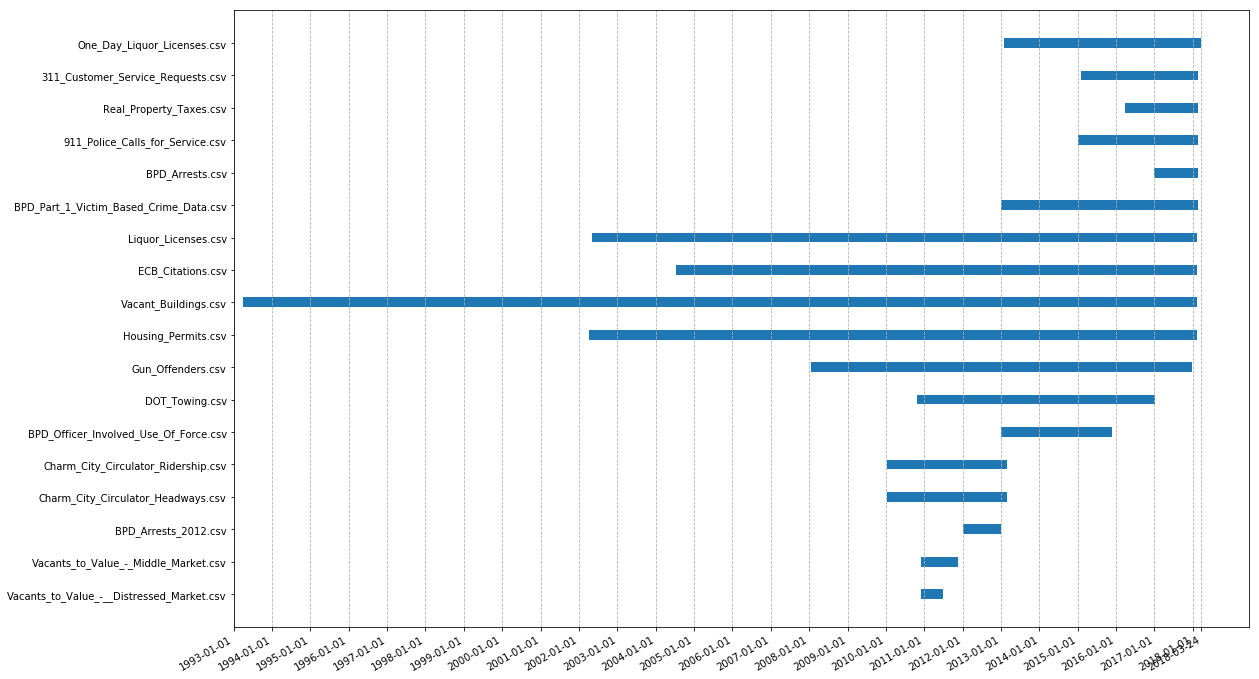

In [80]:
float_char_time_range(df.index.tolist(), df.start.tolist(), df.end.tolist(), True)